In [ ]:
import torchvision.transforms as trn
import torchvision.datasets as dset
import torch

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
device

device(type='cuda')

In [ ]:

# mean and standard deviation of channels of CIFAR-10 images
mean = [0.4914, 0.4822, 0.4465]
std = [0.2023, 0.1994, 0.2010]
test_transform = trn.Compose([trn.ToTensor(), trn.Normalize(mean, std)])        

In [ ]:
data_1 = dset.CIFAR10('./CIFAR_data',train=True, transform=test_transform, download = True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./CIFAR_data/cifar-10-python.tar.gz to ./CIFAR_data


In [ ]:
data_1

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./CIFAR_data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.201])
           )

In [ ]:
test_loader = torch.utils.data.DataLoader(data_1, batch_size=32, shuffle=False)

In [ ]:
from resnet_big import SupConResNet
net = SupConResNet(name='resnet50')
net.encoder = torch.nn.DataParallel(net.encoder)

In [ ]:
model_name = '/content/drive/MyDrive/Study/CS762/Project/Implementation/Large_files/supcon_pretrained_bsz_1024_epochs_500.pth'
net.load_state_dict(torch.load(model_name)['model'])
net.to(device)
net.eval()

SupConResNet(
  (encoder): DataParallel(
    (module): ResNet(
      (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (shortcut): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): BatchNorm2d(256,

In [ ]:
net.to(device)

SupConResNet(
  (encoder): DataParallel(
    (module): ResNet(
      (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (shortcut): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): BatchNorm2d(256,

In [ ]:
import numpy as np
embeddings = np.zeros(shape=(0,128))
test_targets = []
for batch, (x,y) in enumerate(test_loader):
  x, y = x.to(device),  y.to(device)
  out = net(x)
  #print(y)
  #print(out.shape)
  embeddings = np.concatenate([embeddings, out.detach().cpu().numpy()],axis=0)
  test_targets.extend(y.detach().cpu().tolist())
  #print(len(embeddings))



In [ ]:
embeddings.shape

(50000, 128)

In [ ]:
from sklearn.manifold import TSNE
# Create a two dimensional t-SNE projection of the embeddings
tsne = TSNE(2, verbose=1)

In [ ]:
embeddings = np.array(embeddings)
test_targets = np.array(test_targets)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 50000 samples in 0.006s...
[t-SNE] Computed neighbors for 50000 samples in 50.589s...
[t-SNE] Computed conditional probabilities for sample 1000 / 50000
[t-SNE] Computed conditional probabilities for sample 2000 / 50000
[t-SNE] Computed conditional probabilities for sample 3000 / 50000
[t-SNE] Computed conditional probabilities for sample 4000 / 50000
[t-SNE] Computed conditional probabilities for sample 5000 / 50000
[t-SNE] Computed conditional probabilities for sample 6000 / 50000
[t-SNE] Computed conditional probabilities for sample 7000 / 50000
[t-SNE] Computed conditional probabilities for sample 8000 / 50000
[t-SNE] Computed conditional probabilities for sample 9000 / 50000
[t-SNE] Computed conditional probabilities for sample 10000 / 50000
[t-SNE] Computed conditional probabilities for sample 11000 / 50000
[t-SNE] Computed conditional probabilities for sample 12000 / 50000
[t-SNE] Computed conditional probabilities for sa

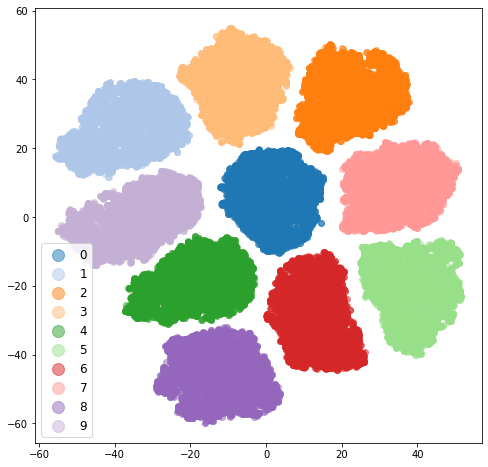

In [ ]:
from matplotlib import cm
import matplotlib.pyplot as plt
tsne_proj = tsne.fit_transform(embeddings)
# Plot those points as a scatter plot and label them based on the pred labels
cmap = cm.get_cmap('tab20')
fig, ax = plt.subplots(figsize=(8,8))
num_categories = 10
for lab in range(num_categories):
    indices = test_targets==lab
    #print(lab, indices)
    ax.scatter(tsne_proj[indices,0],tsne_proj[indices,1], c=np.array(cmap(lab)).reshape(1,4), label = lab ,alpha=0.5)
ax.legend(fontsize='large', markerscale=2)
plt.show()

In [ ]:
type(embeddings)

numpy.ndarray

In [ ]:
with open('/content/drive/MyDrive/Study/CS762/Project/Implementation/Large_files/embeddings.npy', 'wb') as f:
  np.save(f, embeddings)

In [ ]:
pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 6.6 MB/s 
     |████████████████████████████████| 1.1 MB 61.3 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=7c102bf35be1621e6869e55d9e0fe5f8ce53b325a31608bfd53f08bd57ee9a3c
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=f20b61e65b397d5be49c28d1071448dd5232447ec542a6eb4f7f37b2af6ff4eb
  Stored in directory: /root/.cache/pip/wheels/19/bc/eb/974072a56a7082a302f8b4be1ad6d21bf5019235c2eff65928
Successfully built umap-learn pynndescent


In [ ]:
import plotly.express as px

In [ ]:
from umap import UMAP
umap_2d = UMAP(n_components=2, init='random', random_state=0)
proj_2d = umap_2d.fit_transform(embeddings)


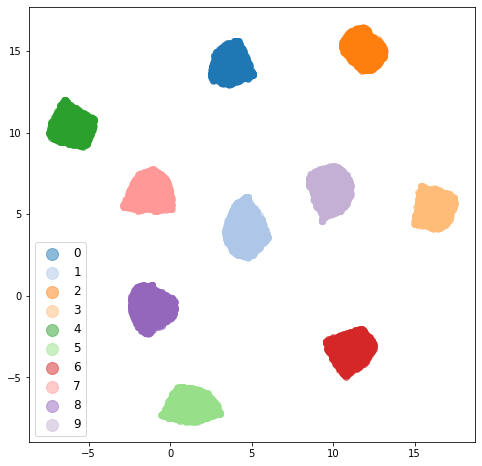

In [ ]:
from matplotlib import cm
import matplotlib.pyplot as plt
#tsne_proj = tsne.fit_transform(embeddings)
# Plot those points as a scatter plot and label them based on the pred labels
cmap = cm.get_cmap('tab20')
fig, ax = plt.subplots(figsize=(8,8))
num_categories = 10
for lab in range(num_categories):
    indices = test_targets==lab
    #print(lab, indices)
    ax.scatter(proj_2d[indices,0],proj_2d[indices,1], c=np.array(cmap(lab)).reshape(1,4), label = lab ,alpha=0.5)
ax.legend(fontsize='large', markerscale=2)
plt.show()